<a href="https://colab.research.google.com/github/chethan1231/dr.analytics/blob/main/Exploratory_Data_Analysis_'SampleSuperstore%20-%20Retail'_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pandas.testing as tm
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from scipy import misc
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/SampleSuperstore - SampleSuperstore.csv")

In [ ]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


ATTRIBUTES OF THE DATASET

In [ ]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=9994, step=1)

In [ ]:
df.size

129922

In [ ]:
df.shape

(9994, 13)

In [ ]:
df.ndim

2

In [ ]:
df.memory_usage()

Index             128
Ship Mode       79952
Segment         79952
Country         79952
City            79952
State           79952
Postal Code     79952
Region          79952
Category        79952
Sub-Category    79952
Sales           79952
Quantity        79952
Discount        79952
Profit          79952
dtype: int64

INDEXING AND SELECTING

In [ ]:
df.loc[3,"Ship Mode"]

'Standard Class'

In [ ]:
df.iloc[3,0]

'Standard Class'

DATATYPES OF THE VARIABLES

In [ ]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [ ]:
df.dtypes.value_counts()

object     8
float64    3
int64      2
dtype: int64

In [ ]:
df.select_dtypes(exclude=['object']).head()

,Postal Code,Sales,Quantity,Discount,Profit
0,42420,261.9600,2,0.00,41.9136
1,42420,731.9400,3,0.00,219.5820
2,90036,14.6200,2,0.00,6.8714
3,33311,957.5775,5,0.45,-383.0310
4,33311,22.3680,2,0.20,2.5164


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
# Dropping the unnecessary columns

#dropping Country and postal code columns
df=df.drop('Country',axis=1)


In [ ]:
df=df.drop('Postal Code',axis=1)

In [ ]:
df.describe(include='all')

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,531,49,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,New York City,California,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,915,2001,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [ ]:
df.describe(include = "all").loc['unique',:]

Ship Mode         4
Segment           3
City            531
State            49
Region            4
Category          3
Sub-Category     17
Sales           NaN
Quantity        NaN
Discount        NaN
Profit          NaN
Name: unique, dtype: object

In [ ]:
df.nunique()

Ship Mode          4
Segment            3
City             531
State             49
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [ ]:
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


From the Heat Map below, we can infer that
1. Profit is positively correlated with sales (0.47) and quality (0.066)
2. Profit is negatively correlated with Discounts offered (-0.219)


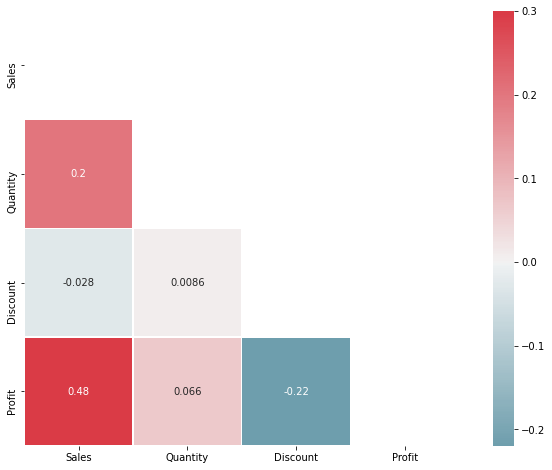

In [ ]:
# Let us get the correlation in the data

# Compute the correlation matrix

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure

f,ax = plt.subplots(figsize=(12, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5,annot = True)
plt.show()

Data Visualization

<Figure size 2160x1800 with 0 Axes>

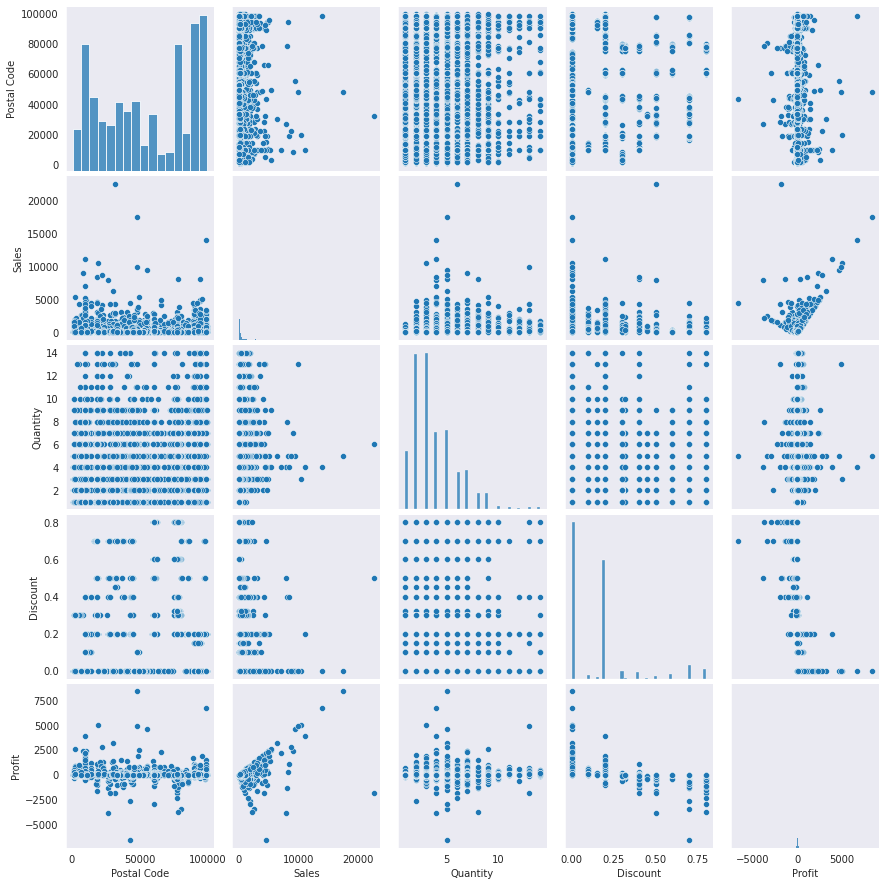

In [ ]:
sns.pairplot(df)
plt.show()

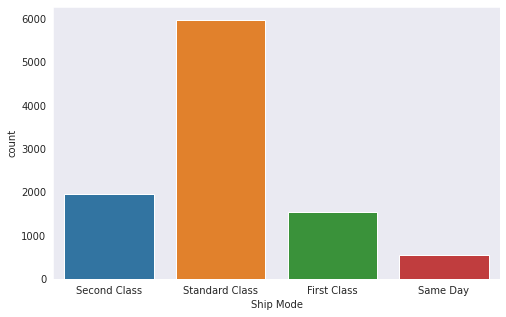

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'Ship Mode' , data = df)

**From the above count plot graph we can infer:**

People prefer Standard Class shipment mode often

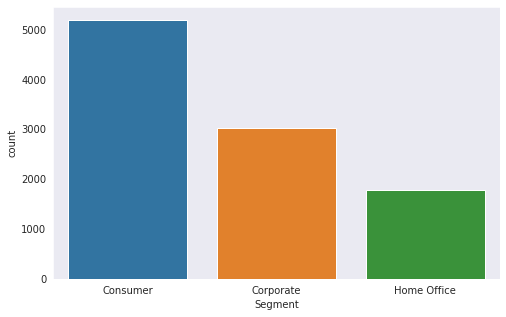

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'Segment' , data = df)

**From the above count plot graph we can infer:**

Customer Segment has majority sales

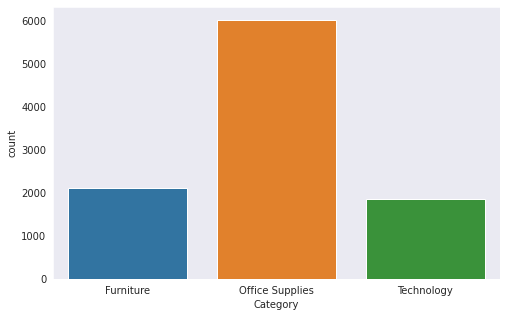

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'Category' , data = df)

**From the above count plot graph we can infer:**

Office Supplies Sales are more in the Category

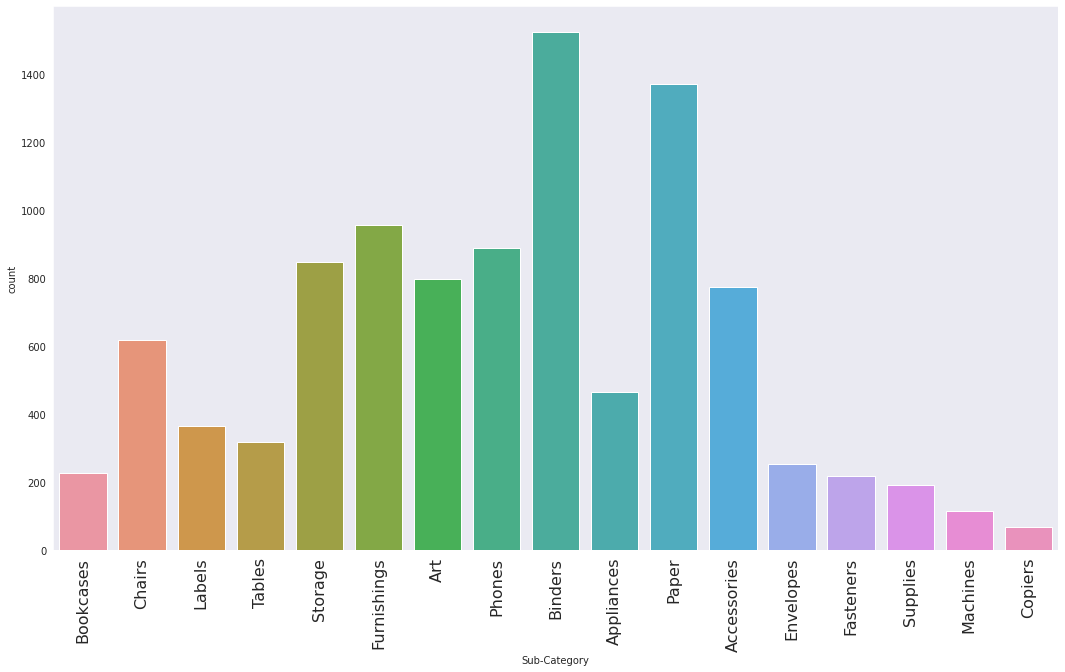

In [ ]:
plt.figure(figsize=(18,10))
plt.xticks(rotation=90, fontsize=16)
sns.countplot(x = 'Sub-Category' , data = df)

**From the above count plot graph we can infer:**

Binders has more sales compared to other items in Sub-Category

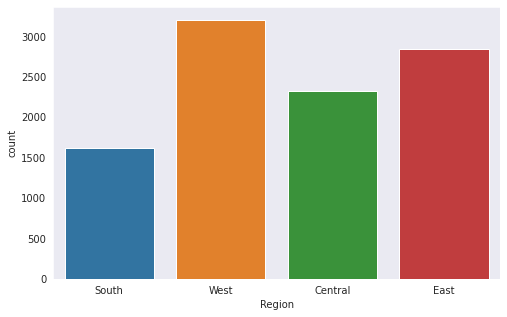

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'Region' , data = df)

**From the above count plot graph we can infer:**

Sales are maximum in the west region

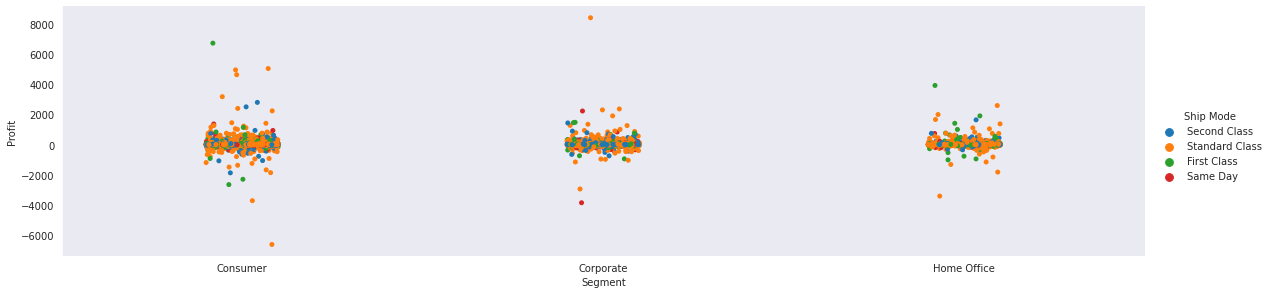

In [ ]:
sns.color_palette('hls',8)
sns.catplot(x ="Segment", y="Profit", data = df, height=4, aspect=4, hue = "Ship Mode");

**From the above Cat-Plot we can infer:**

Consumer segment is earning more profits. 
I can suggest, they can emphasize this segment more to acheive more profit. 
We can infer, home office segment earns less profit compared to others.

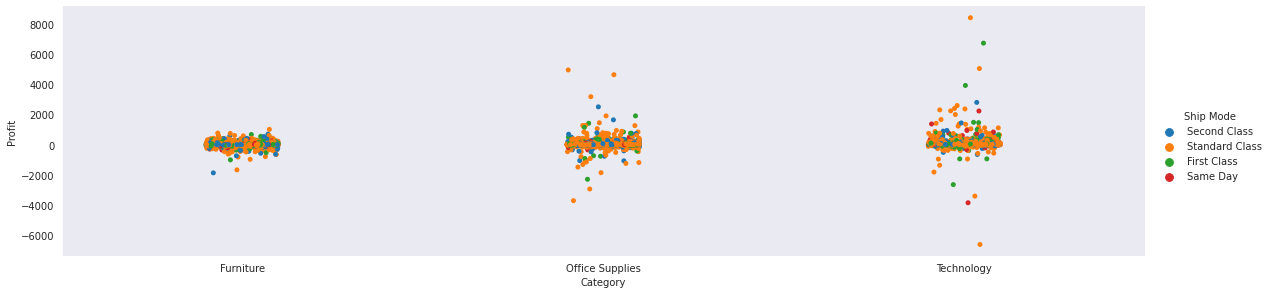

In [ ]:
sns.color_palette('hls',8)
sns.catplot(x ="Category", y="Profit", data = df, height=4, aspect=4,  hue = "Ship Mode");

**From the above Cat-Plot we can infer:**

Technology category is earning more profit. I can suggest, they can emphasize this category to acheive more profit. We can infer, Furniture Category earns less profit compared to others.

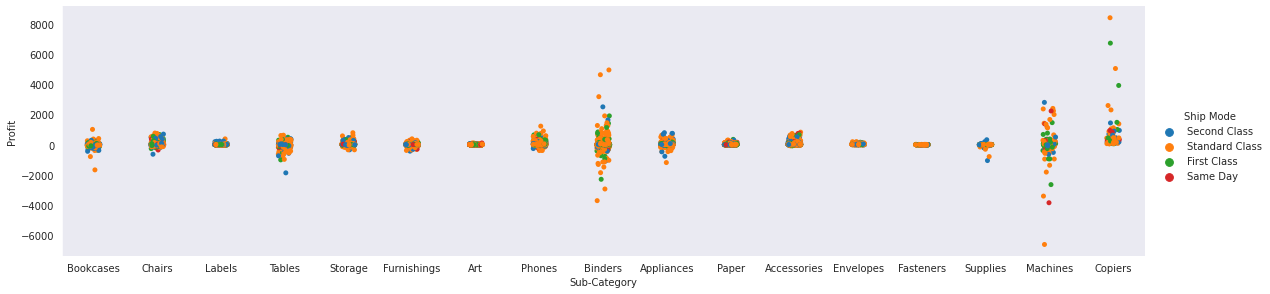

In [ ]:
sns.color_palette('hls',8)
sns.catplot(x ="Sub-Category", y="Profit", data = df, height=4, aspect=4, hue = "Ship Mode");

**From the above Cat-Plot we can infer:**

Copiers Sub-Category is earning more profit. I can suggest, they can emphasize this sub-category to acheive more profit. Though the sale of Binders is more, the profit is not doing well in Binders sub-category. Machines Sub-Category is undergoing loss which is clearly visualize for the graph.






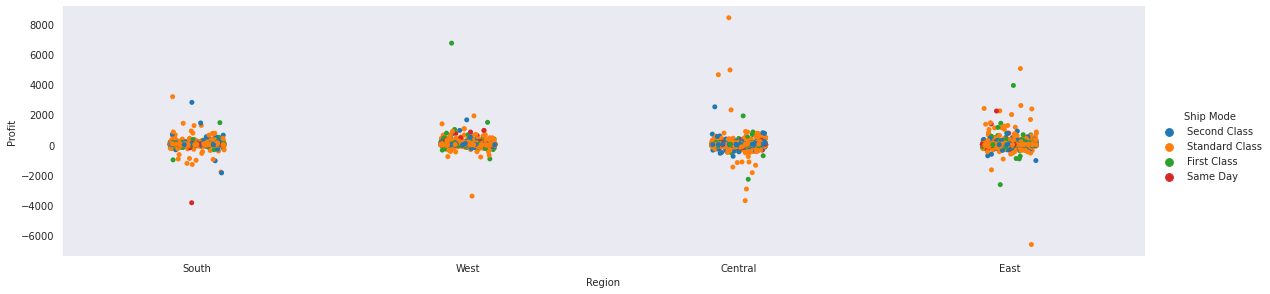

In [ ]:
sns.color_palette('hls',8)
sns.catplot(x ="Region", y="Profit", data = df, height=4, aspect=4, hue = "Ship Mode");

**From the above Cat-Plot we can infer:**

Though the sales in West region is good, profits from that region is not great, Most of the profit retailer is getting from Central region. He can take the necessory actions to furthur improve the profits from that region including East, which is comparitively doing good in earing profits.

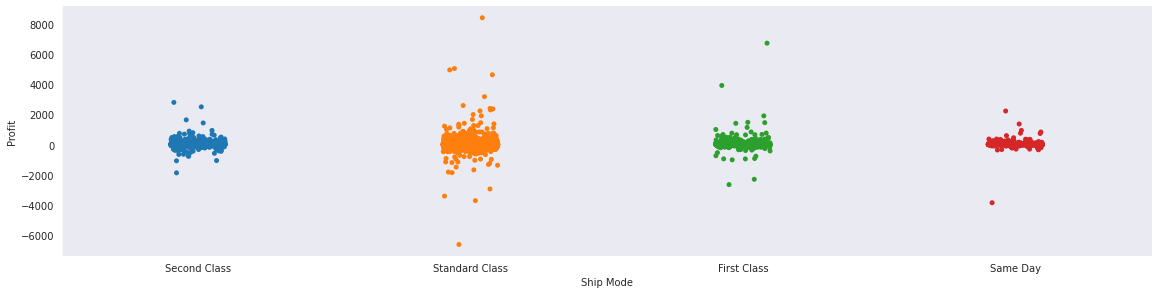

In [ ]:
sns.color_palette('hls',8)
sns.catplot(x ="Ship Mode", y="Profit", data = df, height=4, aspect=4, hue = "Ship Mode");

**From the above Cat-Plot we can infer:**

We can observe from the above graphs most of the profit is earned by Standard class shipment.

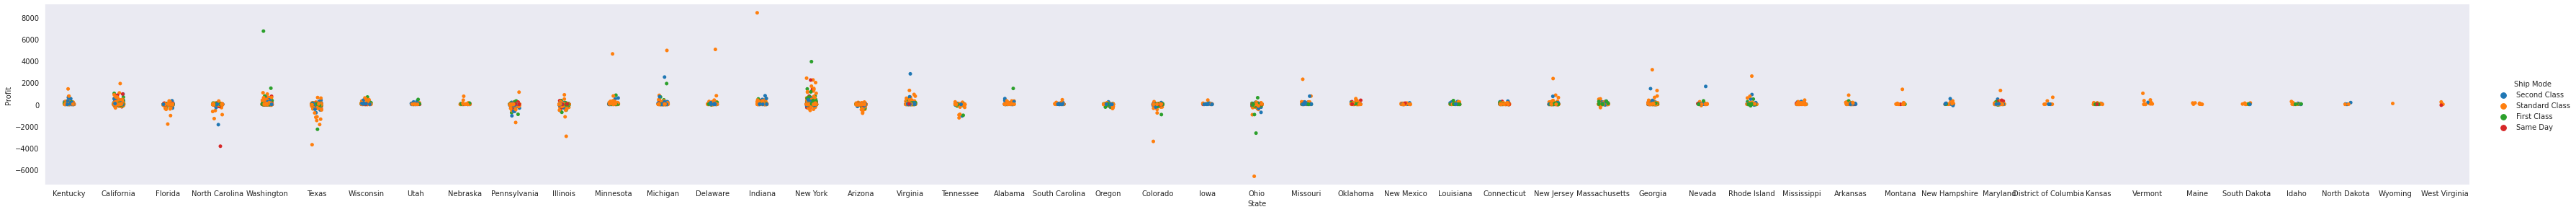

In [ ]:
sns.color_palette('hls',8)
sns.catplot(x ="State", y="Profit", data = df, height=4, aspect=12,hue = "Ship Mode" );

**From the above Cat-Plot we can infer:**

Retailer is certainly fetching good profits from New-York city compared to other States.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


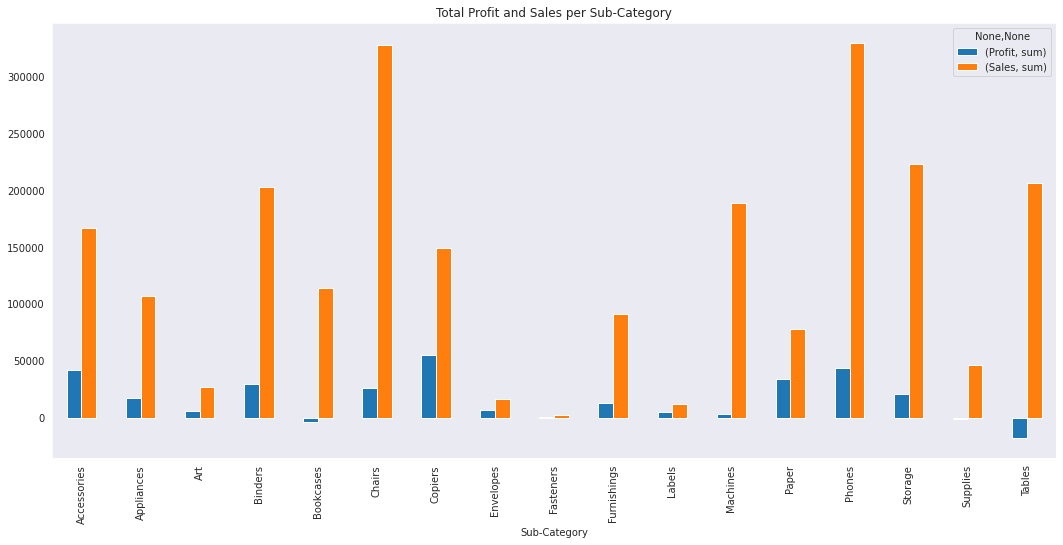

In [ ]:
df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar(figsize=(18,8))
plt.title('Total Profit and Sales per Sub-Category')
# plt.legend('Profit')
# plt.legend('Sales')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


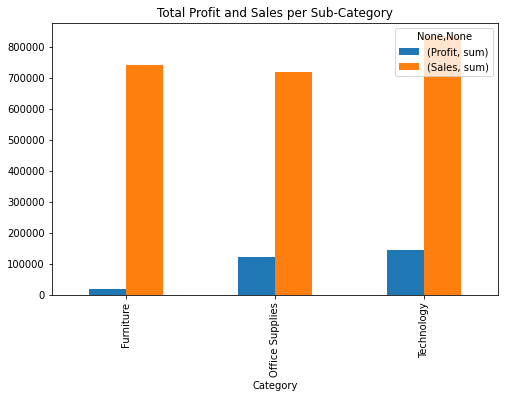

In [ ]:
df.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar(figsize=(8,5))
plt.title('Total Profit and Sales per Sub-Category')
plt.show()